# Week 8 assignment

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sympy
from sympy import *
init_printing(use_unicode = True, fontsize = 16)
pi2 = pi * 2

In [3]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes'
    
sys.path.append(path)

from waves.sound import *
from waves.tools.dsp import *  
from waves.tools.dsp.sampling import * 
from waves.tools.dsp.interpolator import * 

In [4]:
from scipy import signal

# 1. 
250000000 1250000000

In [5]:
M = 5
Fmin = 250 * 1e6
Fmax = 500 * 1e6
K = 4
Fs = 1e9
W = Fmax - Fmin
baud_rate = int(W)
through_put = baud_rate * M
'{} {}'.format(baud_rate, through_put)

'250000000 1250000000'

# 2. 
18000

In [6]:
W = 3000
SNR_dB = 30
Perr = 1e-6

M = mapper.get_M(SNR_dB, Perr)
bits_per_sec = int(M * W)
bits_per_sec

# 3. 
F 
s  =1.5 GHz, K=10K=10  
Fs =2.4 GHz, K=12 

In [7]:
Fmin = 400 * 1e6
Fmax = 600 * 1e6
W = bandwidth = Fmax - Fmin 

In [8]:
K = int(np.ceil(2 * Fmax / W))
Fs = W * K

W, K, Fs

In [9]:
def sufficient(Fs, K):
    return Fs / K <= W and Fs >= 2 * Fmax

In [10]:
sufficient(1.5e9, 10)

True

In [11]:
sufficient(2.4e9, 12)

True

In [12]:
sufficient(1.5e9, 5)

False

In [13]:
sufficient(1.9e9, 9)

False

In [14]:
sufficient(1.e9, 5)

False

# 4. 
4 2 1 3

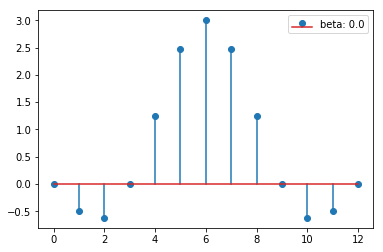

/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes/waves/tools/dsp/__init__.py:383: RuntimeWarning: divide by zero encountered in true_divide
  (period - 2 * beta * t) * (period + 2 * beta * t))


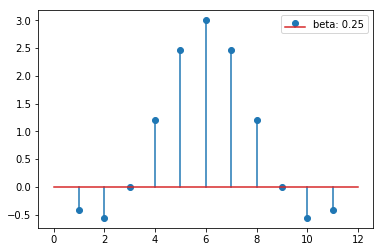

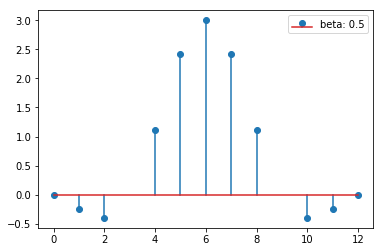

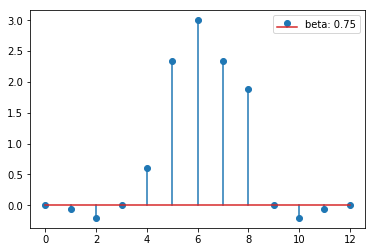

In [15]:
for b in np.linspace(0, 0.75, 4):
    plt.stem(filtering.raised_cosine_fir(fir_size=13, beta = b), label = 'beta: {}'.format(b))
    plt.legend()
    plt.show()

# 5. 
103.50

$$
\begin{align}
\sigma_{signal}^2 &= G^2  \\
\sigma_{signal} &= G  \\
\sigma_{noise}^2 &= \frac{(b-a)^2 }{ 12}  \\
\sigma_{noise}  &= \frac{(b-a)  }{ \sqrt{12}}  \\
SNR &=  \frac{\sigma_{signal}^2 }{ \sigma_{noise}^2 }  \\
\sqrt{SNR}) &= \frac{\sigma_{signal} }{ \sigma_{noise} }  \\
&= \frac{\sqrt{12}\sigma_{signal} }{(b-a) }  \\
P_{err} &= erfc(\sqrt{SNR})  \\
&= erfc(\frac{\sqrt{12}\sigma_{signal} }{(b-a) })  \\
&= erfc(\frac{\sqrt{12}G }{(b-a) })  \\
\\ 
SNR &=  \frac{32\sigma_{signal}^2 }{31 \sigma_{noise}^2 }  \\
\sqrt{SNR}) &= \frac{\sigma_{signal} }{ \sigma_{noise} } \sqrt{\frac{32}{31}} \\
&= \frac{\sqrt{12}\sigma_{signal} }{(b-a) }  \sqrt{\frac{32}{31}} \\
P_{err} &= erfc(\sqrt{SNR})  \\
&= erfc(\frac{\sqrt{12}\sigma_{signal} }{(b-a) } \sqrt{\frac{32}{31}})  \\
&= erfc(\frac{\sqrt{12}G }{(b-a) } \sqrt{\frac{32}{31}})  \\
\end{align}
$$

In [16]:
n = np.arange(-31, 32, 2)
n

array([-31, -29, -27, -25, -23, -21, -19, -17, -15, -13, -11,  -9,  -7,
        -5,  -3,  -1,   1,   3,   5,   7,   9,  11,  13,  15,  17,  19,
        21,  23,  25,  27,  29,  31])

In [17]:
len(n)

In [18]:
from scipy import special
from scipy import optimize

M = 5
noise_range = 100 - (-100)
sigma_noise = noise_range / np.sqrt(12)

Perr_max = 1e-2 

def get_Perr(gain): 
    return special.erfc(np.sqrt(12) * gain / noise_range * np.sqrt(32/31)) - Perr_max

sol = optimize.root(get_Perr, [100, 150])
gain_min = sol.x[0]
print('Solutions: ', sol.x)
print('Minimum gain: {:0.2f}'.format(gain_min))

Solutions:  [103.50165926 103.50165926]
Minimum gain: 103.50


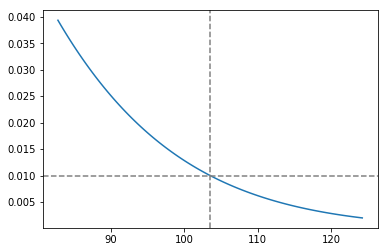

In [19]:
G = np.linspace(gain_min*0.8, gain_min*1.2, 100)
p = get_Perr(G)  + Perr_max

plt.plot(G, p)
plt.axhline(Perr_max, color = 'grey', ls = '--' )
plt.axvline(gain_min, color = 'grey', ls = '--' )
plt.show()

# 6. 
12 Mbit/s


6.5 Mbit/s


36 Mbit/s

In [20]:
W = bandwidth = 6e6
SNR_dB = 20

c = dsp.channel_capacity(W, SNR_dB)
c / 1e6

# 7. 
Decrease the bit rate  
Decrease the constellation size MM

# 8. 
1+cos, 1+sin

cos cos, sin cos

cos, sin

In [21]:
n = symbols('n', integer = True)
w = symbols('w', real = True)
s = cos(w*n) - I*sin(w*n)

def demodulate(m):
    s1 = s*m
    s1 = s1.rewrite(E)
    return trigsimp(trigsimp(s1) )
#     return s1

In [22]:
m = 1+ cos(w*n)
demodulate(m)

In [23]:
m = cos(w*n)
demodulate(m)

In [24]:
m = cos(w*n/2)*cos(3*w*n/2)
demodulate(m)

In [25]:
m = sin(w*n/2)*sin(3*w*n/2)
demodulate(m)

In [26]:
m = sin(w*n/2)*cos(3*w*n/2)
demodulate(m)

In [27]:
m = cos(w*n/2)*sin(3*w*n/2)
demodulate(m)

In [28]:
m = cos(w*n/2)*cos(3*w*n/2)
demodulate(m)

# 9. 
1 2 5

# 10.
-2

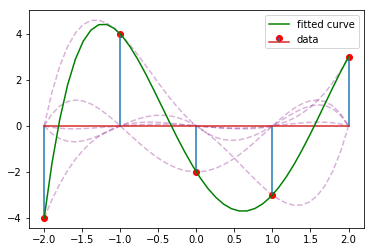

In [29]:
s = np.array([-4, 4, -2, -3, 3])
N = [-2, -1, 0, 1, 2]

li = Lagrange()
poly = li.poly_fit(s, N, plot = True);

In [30]:
tau2 = 0
_, v = poly(tau2)
v

array([-2.])

In [31]:
# test at second time

N = 1
tau = 1/4
y = -2 + 1/4 * (-3-(-2))
y

# 11. 
2 3

In [32]:
N = 8
k = np.arange(N)
w_k = k * np.pi / N 
w_k

array([0.        , 0.39269908, 0.78539816, 1.17809725, 1.57079633,
       1.96349541, 2.35619449, 2.74889357])

In [33]:
Fs = 2e6
F_nyquist = Fs/2
W_subchannel = F_nyquist / 8 
w_center = k * W_subchannel
Perr_max = 1e-6
SNRs_dB = np.array([0, 28, 4, 24, 16, 20, 8, 12])
Ms = mapper.get_M(SNRs_dB, Perr_max)
print(Ms)

throughput = Ms * W_subchannel
np.argsort(throughput)

[0 6 0 4 2 3 0 1]


array([0, 2, 6, 7, 4, 5, 3, 1])

In [34]:
throughput

array([     0., 750000.,      0., 500000., 250000., 375000.,      0.,
       125000.])

# 12. 
500000 750000 1250000

In [35]:
Fs = 2e6
F_nyquist = Fs/2
W_subchannel = F_nyquist / 8 
# w_center = k * W_subchannel

SNRs_dB = np.array([0, 40, 8, 24, 32, 8, 30, 42])
Perr_max = 1e-6
Ms = mapper.get_M(SNRs_dB, Perr_max)
Ms[4] = 6  # subchannel 4 should have M as 6 instead of 7
print(Ms)

throughput = Ms * W_subchannel
'{:.0f} {:.0f} {:.0f}'.format(throughput[3], throughput[4], throughput[7])

[ 0 10  0  4  6  0  6 10]


'500000 750000 1250000'